In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("/content/pima-indians-diabetes.csv")

In [ ]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X=df.drop("class",axis=1)
y=df["class"]

In [ ]:
X

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

## Divide your data into training, validation and test

In [ ]:
X_train1,X_test,y_train1,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(X_train1,y_train1,test_size=0.2,random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()

In [ ]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
param_grid={"n_neighbors": list(range(1,9)),
    "algorithm":("auto", "ball_tree", "kd_tree", "brute")
}

In [ ]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(knn_clf,param_grid,cv=20)

In [ ]:
gs.fit(X_train,y_train)

GridSearchCV(cv=20, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [ ]:
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 8}

In [ ]:
gs.cv_results_['params']

[{'algorithm': 'auto', 'n_neighbors': 1},
 {'algorithm': 'auto', 'n_neighbors': 2},
 {'algorithm': 'auto', 'n_neighbors': 3},
 {'algorithm': 'auto', 'n_neighbors': 4},
 {'algorithm': 'auto', 'n_neighbors': 5},
 {'algorithm': 'auto', 'n_neighbors': 6},
 {'algorithm': 'auto', 'n_neighbors': 7},
 {'algorithm': 'auto', 'n_neighbors': 8},
 {'algorithm': 'ball_tree', 'n_neighbors': 1},
 {'algorithm': 'ball_tree', 'n_neighbors': 2},
 {'algorithm': 'ball_tree', 'n_neighbors': 3},
 {'algorithm': 'ball_tree', 'n_neighbors': 4},
 {'algorithm': 'ball_tree', 'n_neighbors': 5},
 {'algorithm': 'ball_tree', 'n_neighbors': 6},
 {'algorithm': 'ball_tree', 'n_neighbors': 7},
 {'algorithm': 'ball_tree', 'n_neighbors': 8},
 {'algorithm': 'kd_tree', 'n_neighbors': 1},
 {'algorithm': 'kd_tree', 'n_neighbors': 2},
 {'algorithm': 'kd_tree', 'n_neighbors': 3},
 {'algorithm': 'kd_tree', 'n_neighbors': 4},
 {'algorithm': 'kd_tree', 'n_neighbors': 5},
 {'algorithm': 'kd_tree', 'n_neighbors': 6},
 {'algorithm': 'kd

In [ ]:
gs.cv_results_['mean_test_score']

array([0.67383333, 0.69091667, 0.68116667, 0.707     , 0.71541667,
       0.71083333, 0.71733333, 0.73166667, 0.67383333, 0.69091667,
       0.68116667, 0.707     , 0.71541667, 0.71083333, 0.71733333,
       0.73166667, 0.67383333, 0.69091667, 0.68116667, 0.707     ,
       0.71541667, 0.71083333, 0.71733333, 0.73166667, 0.67383333,
       0.69091667, 0.68116667, 0.707     , 0.71541667, 0.71083333,
       0.71733333, 0.73166667])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=8,algorithm="auto")

In [ ]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
from sklearn import metrics

In [ ]:
y_pred=knn_clf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7402597402597403


## ROC Curve

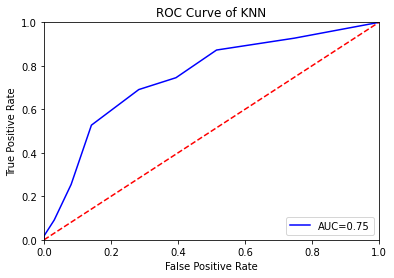

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
y_scores=knn_clf.predict_proba(X_test)
fpr,tpr,threshold=roc_curve(y_test,y_scores[:,-1])
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,'b',label='AUC=%0.2f' % roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve of KNN")
plt.show()